In [1]:
import torch
import sys
sys.path.append('/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2')
import detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)# Some basic setup:
# Setup detectron2 logger

from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, PolygonMasks
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
import random
import detectron2

# List available modules, attributes, or functions
print(dir(detectron2))

# Get the path of the detectron2 package
print(detectron2.__path__)


import matplotlib.pyplot as plt
import cv2
import torch
from detectron2.structures import Instances, Boxes

print(torch.cuda.is_available())

print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
import detectron2
import os

detectron2_path = os.path.dirname(detectron2.__file__)
print(detectron2_path)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0
torch:  1.11 ; cuda:  cu113
detectron2: 0.6
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'checkpoint', 'config', 'data', 'engine', 'evaluation', 'layers', 'model_zoo', 'modeling', 'setup_environment', 'solver', 'structures', 'utils']
['/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2/detectron2']
True
0
NVIDIA GeForce RTX 4080 Laptop GPU
/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2/detectron2


# Register dataset in Detectron2

Importante: 

- bbox=[x_min,x_max,y_min,y_max] !!


(en el json las coords de cada poly no contienen cx cy w h)

Los json buenos son los 6, los he generado con MaskRCNN/generate_dataset_coco.py


Los json 7 son [x_min,y_min,w,h]. Todo depende de bbox_mode

In [2]:

register_coco_instances("my_dataset_train", {}, "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/annotations/instances_train7.json", "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/images")
register_coco_instances("my_dataset_val", {}, "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/val/annotations/instances_val7.json", "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/val/images")
# Get metadata for your dataset
metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")
print(dataset_dicts[0])

[08/03 11:04:18 d2.data.datasets.coco]: Loading /home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/annotations/instances_train7.json takes 1.90 seconds.
[08/03 11:04:18 d2.data.datasets.coco]: Loaded 9259 images in COCO format from /home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/annotations/instances_train7.json
{'file_name': '/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/images/7837835140118832722.png', 'height': 256, 'width': 256, 'image_id': '0', 'annotations': [{'iscrowd': 0, 'bbox': [232.0, 172.0, 16.0, 32.0], 'category_id': 0, 'segmentation': [[237.0, 187.0, 237.0, 186.0, 236.0, 185.0, 235.0, 183.0, 236.0, 184.0, 234.0, 181.0, 235.0, 182.0, 234.0, 180.0, 233.0, 178.0, 232.0, 176.0, 234.0, 179.0, 233.0, 177.0, 232.0, 175.0, 232.0, 174.0, 232.0, 173.0, 233.0, 173.0, 233.0, 172.0, 234.0, 172.

In [3]:
# Get the keys from coco_api.imgs
from pycocotools.coco import COCO
json_file="/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/annotations/instances_train7.json"
coco_api = COCO(json_file)
img_ids = coco_api.imgs.keys()

# Identify the data types of the keys
key_types = {type(key) for key in img_ids}
print(key_types)
# Check if there's a mix of data types
if len(key_types) > 1:
    # Convert all keys to strings
    img_ids = [str(key) for key in img_ids]

# Sort the keys
sorted_img_ids = sorted(img_ids)

# Continue with your code using sorted_img_ids


loading annotations into memory...
Done (t=1.87s)
creating index...
index created!
{<class 'str'>}


(256, 256, 3)
/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/images/5673337906713966446.png
(256, 256, 3)
/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/images/2924939226352256144.png
(256, 256, 3)
/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/images/2182658357996130924.png


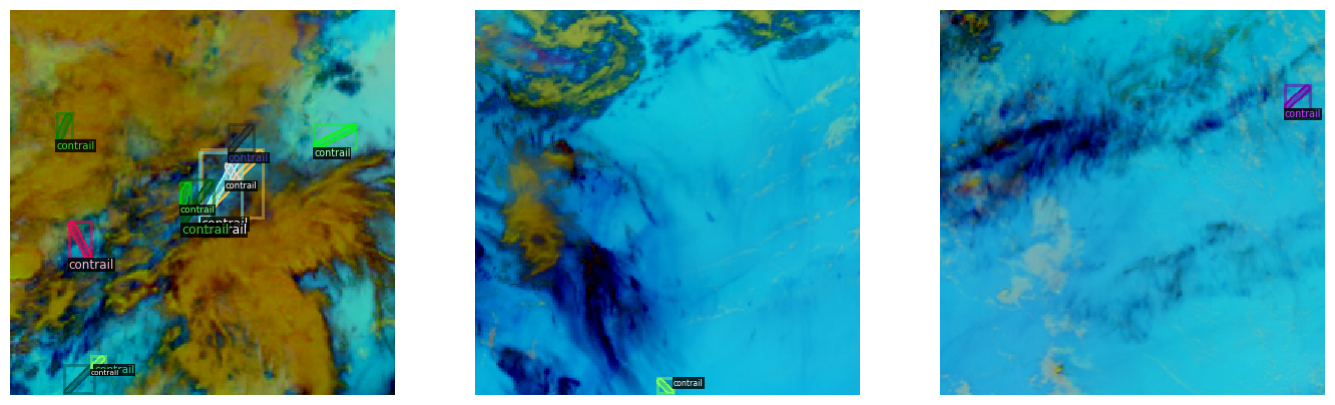

In [29]:
import matplotlib.pyplot as plt
import random
import cv2
from detectron2.utils.visualizer import Visualizer
import tifffile
# Assuming dataset_dicts is a list containing dictionaries with file_name information

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

# Iterate over three random samples
for i, d in enumerate(random.sample(dataset_dicts, 3)):
    # Read image
    img = cv2.imread(d["file_name"])

    print(img.shape)
    
    # Print file_name
    print(d['file_name'])
    
    # Create visualizer
    visualizer = Visualizer(img, metadata=metadata, scale=1.5)
    
    # Draw annotations on the image
    out = visualizer.draw_dataset_dict(d)
    
    # Display the image in the corresponding subplot
    axs[i].imshow(out.get_image()[:, :, ::-1])
    axs[i].axis('off')

# Show the plot
plt.show()


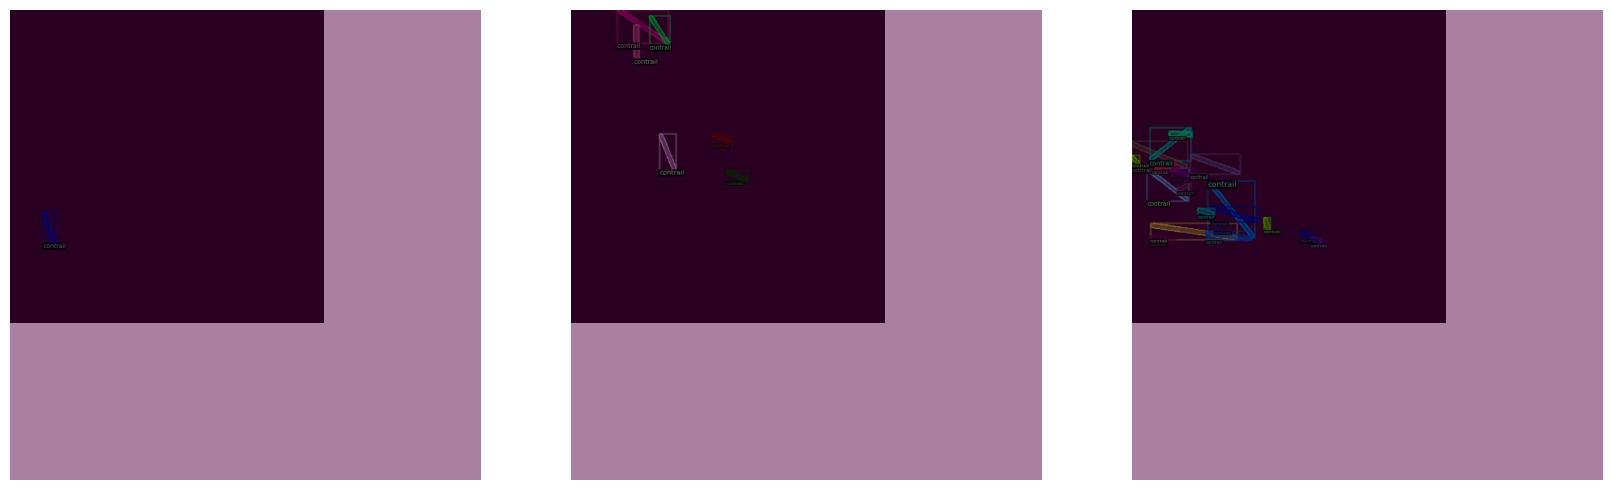

In [18]:

import matplotlib.pyplot as plt
import random
import cv2
from detectron2.utils.visualizer import Visualizer
import numpy as np
import tifffile

# Assuming dataset_dicts contains "file_name" and "annotations"

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

# Iterate over three random samples
for i, d in enumerate(random.sample(dataset_dicts, 3)):
    # Read the ground truth mask
    gt_mask_path = d.get("mask_file_name", None)  # Adjust based on how masks are stored
    gt_mask = tifffile.imread(gt_mask_path) if gt_mask_path else np.zeros((512, 512))

    # Normalize the mask for visualization
    gt_mask_normalized = gt_mask / gt_mask.max() if gt_mask.max() > 0 else gt_mask

    # Display the mask with a colormap
    axs[i].imshow(gt_mask_normalized, cmap='gray')  # Change cmap to 'nipy_spectral' if desired
    
    # Overlay the polygons (annotations)
    img = np.zeros_like(gt_mask, dtype=np.uint8)  # Placeholder for polygon drawing
    visualizer = Visualizer(img, metadata=metadata, scale=1.5)
    out = visualizer.draw_dataset_dict(d)
    axs[i].imshow(out.get_image()[:, :, ::-1], alpha=0.5)  # Overlay with transparency
    
    # Turn off axis
    axs[i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


# TRAIN

In [3]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator
from detectron2.modeling import META_ARCH_REGISTRY, GeneralizedRCNN
from detectron2.data import transforms as T
from detectron2.data import DatasetMapper, build_detection_train_loader
# Create a detectron2 config and set the desired parameters
#BEST:mask_rcnn_R_50_C4_3x, mask_rcnn_R_50_DC5_3x
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml"))

cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.SOLVER.OPTIMIZER = "SGD"


cfg.DATALOADER.NUM_WORKERS = 16
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")  # You can use a pre-trained model as a starting point
cfg.SOLVER.IMS_PER_BATCH = 120
cfg.SOLVER.BASE_LR = 0.0001
cfg.SOLVER.MAX_ITER = 2000
cfg.SOLVER.STEPS = []  # Adjust this based on your requirements
cfg.MODEL.RPN.NMS_THRESH=0.2
cfg.SOLVER.CLIP_GRADIENTS.ENABLED = True
cfg.SOLVER.CLIP_GRADIENTS.CLIP_TYPE = "value"
cfg.SOLVER.CLIP_GRADIENTS.CLIP_VALUE = 4.0
cfg.SOLVER.AMP.ENABLED = True
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2  # Start with 0.5 and adjust

#cfg.MODEL.WEIGHTS='/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/output_detectron/model_final1.pth'
cfg.SOLVER.WEIGHT_DECAY = 0.001 # Adjust weight decay if needed
cfg.SOLVER.LR_SCHEDULER_NAME = "WarmupCosineLR"
cfg.SOLVER.MOMENTUM = 0.8
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# Create a custom output directory to save the trained model
cfg.DATALOADER.FILTER_EMPTY_ANNOTATIONS = False
""" cfg.MODEL.ROI_BOX_HEAD.LOSS = "FocalLoss"
cfg.MODEL.ROI_MASK_HEAD.LOSS = "CrossEntropy" """
""" cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_WEIGHT = 1.0  # Increase the box loss weight

cfg.MODEL.ROI_BOX_HEAD.CLS_WEIGHT = 1.0  """
cfg.MODEL.ROI_MASK_HEAD.MASK_LOSS_WEIGHT = 1.5
cfg.OUTPUT_DIR = "./output_detectron_SGD"


/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2/detectron2/model_zoo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml


## Random Augmentations

In [27]:
cfg.INPUT.RANDOM_FLIP = "horizontal"  # or "vertical" or "none"

# Resize settings
cfg.INPUT.MIN_SIZE_TRAIN = (512, 640, 768)  # List of sizes for random selection
cfg.INPUT.MAX_SIZE_TRAIN = 1024  # Maximum size for the longer edge
cfg.INPUT.MIN_SIZE_TEST = 512
cfg.INPUT.MAX_SIZE_TEST = 1024

# You can also specify additional augmentations using the following flags:
cfg.INPUT.RANDOM_CROP = True  # Enable random cropping if needed

# For brightness, contrast, etc., you can set default values
cfg.INPUT.RANDOM_BRIGHTNESS = [0.8, 1.2]  # Adjusts brightness
cfg.INPUT.RANDOM_CONTRAST = [0.8, 1.2]    # Adjusts contrast
cfg.INPUT.RANDOM_SATURATION = [0.8, 1.2]   # Adjusts saturation
cfg.INPUT.RANDOM_ROTATION = [-15, 15]  # Specify rotation angles

In [4]:
from detectron2.data import DatasetMapper, build_detection_train_loader
from detectron2.engine import DefaultTrainer
from detectron2.data import transforms as T

class CustomTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        return build_detection_train_loader(
            cfg,
            mapper=DatasetMapper(
                is_train=True,
                augmentations=[
                    T.ResizeShortestEdge(short_edge_length=(640, 800), max_size=1333, sample_style="choice"),
                    T.RandomFlip(prob=0.5, horizontal=True, vertical=False),
                    T.RandomBrightness(0.9, 1.1),
                    T.RandomSaturation(0.9, 1.1)
                      # Add GaussianBlur transformation
                ],
                image_format="BGR",
                use_instance_mask=True
            )
        )

import torch
import torch.nn.functional as F
import time
def dice_loss(input, target):
    smooth = 1.0
    iflat = input.contiguous().view(-1)
    tflat = target.contiguous().view(-1)
    intersection = (iflat * tflat).sum()
    
    return 1 - ((2. * intersection + smooth) / (iflat.sum() + tflat.sum() + smooth))
from detectron2.engine import DefaultTrainer

class CustomTrainer2(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        return build_detection_train_loader(
            cfg,
            mapper=DatasetMapper(
                is_train=True,
                augmentations=[
                    T.ResizeShortestEdge(short_edge_length=(640, 800), max_size=1333, sample_style="choice"),
                    T.RandomFlip(prob=0.5, horizontal=True, vertical=False),
                    T.RandomBrightness(0.9, 1.1),
                    T.RandomSaturation(0.9, 1.1)
                      # Add GaussianBlur transformation
                ],
                image_format="BGR",
                use_instance_mask=True
            )
        )

    def run_step(self):
        assert self.model.training
        start = time.perf_counter()
        data = next(self._data_loader_iter)
        data_time = time.perf_counter() - start

        loss_dict = self.model(data)
        
        # Extract necessary tensors
        input = loss_dict['pred_masks']  # Example key, adjust based on your model's output
        target = data['annotations']['segmentation']  # Example key, adjust based on your data

        # Calculate custom Dice Loss
        loss_dict['dice_loss'] = dice_loss(input, target)

        losses = sum(loss_dict.values())
        self.optimizer.zero_grad()
        losses.backward()
        self.optimizer.step()

        self._write_metrics(loss_dict, data_time)


In [4]:
            
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# Create a trainer and train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

trainer.train()


[10/15 23:30:14 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 2048) in the checkpoint but (2, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 2048) in the checkpoint but (4, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[10/15 23:30:38 d2.engine.train_loop]: Starting training from iteration 0
ERROR [10/15 23:30:47 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2/detectron2/engine/train_loop.py", line 155, in train
    self.run_step()
  File "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2/detectron2/engine/defaults.py", line 499, in run_step
    self._trainer.run_step()
  File "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2/detectron2/engine/train_loop.py", line 494, in run_step
    loss_dict = self.model(data)
  File "/home/irortiza/.local/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2/detectron2/modeling/meta_arch/rcnn.py", line 158, in forward
    features = self.backbone(image

RuntimeError: CUDA out of memory. Tried to allocate 2.29 GiB (GPU 0; 11.63 GiB total capacity; 6.71 GiB already allocated; 1.33 GiB free; 8.45 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [13]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir ./output_detectron

Launching TensorBoard...

In [26]:
# Evaluate the trained model
# Specify an evaluator for testing (you can use COCOEvaluator as an example)
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("my_dataset_val", cfg, False, output_dir="./output_detectron_SGD")

val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

#eval_results = trainer.test(cfg, trainer.model, evaluators=[evaluator])
#print(eval_results)

[10/15 23:15:15 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/15 23:15:15 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/15 23:15:15 d2.data.datasets.coco]: Loaded 1856 images in COCO format from /home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn_all/val/annotations/instances_val7.json
[10/15 23:15:16 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/15 23:15:16 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/15 23:15:16 d2.data.common]: Serializing 1856 elements to byte tensors and concatenating them all ...
[10/15 23:15:16 d2.data.common]: Serialized dataset takes 4.32 MiB
[10/15 23:15:16 d2.ev

## Predictions

In [12]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)


[10/15 23:13:53 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output_detectron_SGD/model_final.pth ...


In [13]:
dataset_dicts2 = DatasetCatalog.get("my_dataset_val")
# Assuming dataset_dicts and target_filepath are defined as in your previous code

[10/15 23:13:55 d2.data.datasets.coco]: Loaded 1856 images in COCO format from /home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn_all/val/annotations/instances_val7.json


/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn_all/val/images/3421509300024874511.png
1428


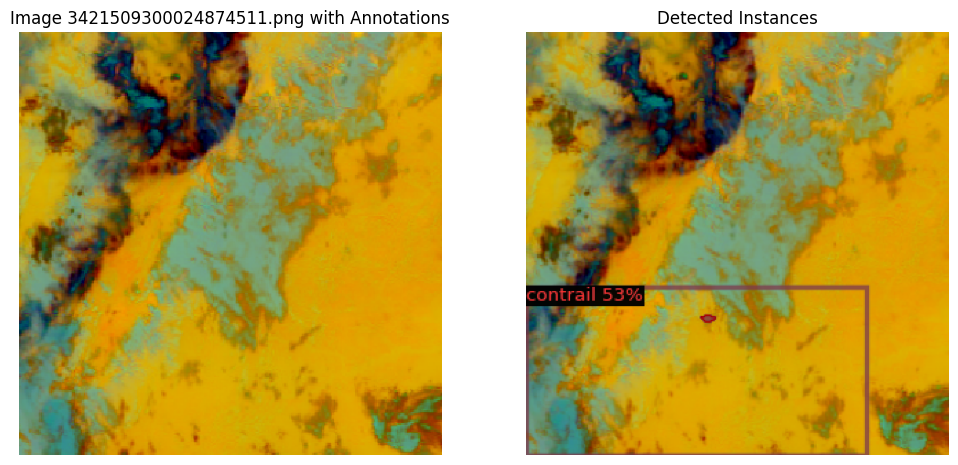

In [25]:

target_filepath='/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn_all/val/images/'
#target_filepath='/home/irortiza/Pictures/MSG_CROPS/20220102/0000/'
# List all files in the directory
all_files = os.listdir(target_filepath)
random.seed()
random_file = random.choice(all_files)
#random_file='/home/irortiza/Pictures/MSG3_CROPS/20240126/0045/tile_2_5.png'


# Create the full path to the randomly selected file
random_file_path = os.path.join(target_filepath, random_file)
print(random_file_path)
im=cv2.imread(random_file_path)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], metadata, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# Find the index of the target file in the dataset
for index, data_dict in enumerate(dataset_dicts2):
    #print(data_dict.get('file_name'))

    if data_dict.get('file_name') == random_file_path:
        i = index
        print(i)
        break

# Get the image and metadata for the target file
d = dataset_dicts2[i]
img = cv2.imread(d["file_name"])
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

    # Create visualizer
visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=1.5)

# Draw annotations on the image
out = visualizer.draw_dataset_dict(d)



# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first image with annotations

axs[0].imshow(out.get_image()[:, :, ::-1])
axs[0].set_title(f"Image {os.path.basename(random_file_path)} with Annotations")
axs[0].axis('off')


out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
axs[1].imshow(out.get_image()[:, :, ::-1])
axs[1].set_title("Detected Instances")
axs[1].axis('off')

# Display the merged plot
plt.show()


## feature maps

In [4]:
dir='/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/outputs_detectron/output_detectron_all/model_final.pth'

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
cfg.MODEL.WEIGHTS = dir  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)


[08/03 11:04:31 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/outputs_detectron/output_detectron_all/model_final.pth ...


In [5]:
import torch
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer

# Setup config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")
cfg.MODEL.DEVICE = "cuda"

# Build model and load weights
model = build_model(cfg)
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)
model.eval()

# Dictionary to hold activations
activations = {}

# Register hook to a layer, e.g., conv1 in stem
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach().cpu()
    return hook

model.backbone.stem.conv1.register_forward_hook(get_activation("stem.conv1"))
model.backbone.res2[0].conv2.register_forward_hook(get_activation("res2.0.conv2"))
model.backbone.res3[0].conv2.register_forward_hook(get_activation("res3.0.conv2"))
model.backbone.res4[0].conv3.register_forward_hook(get_activation("res4.0.conv3"))

# ROI Head (if you want to check after proposal)
model.roi_heads.res5[0].conv2.register_forward_hook(get_activation("res5.0.conv2"))
model.roi_heads.mask_head.deconv.register_forward_hook(get_activation("mask_head.deconv"))
model.roi_heads.mask_head.predictor.register_forward_hook(get_activation("mask_head.predictor"))


/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2/detectron2/model_zoo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml
[08/03 11:04:31 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x/137849525/model_final_4ce675.pkl ...


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 2048) in the checkpoint but (2, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 2048) in the checkpoint but (4, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

In [27]:
# === Hooked Activations Dictionary ===
activations = {}

def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach().cpu()
    return hook

# === Backbone: model.backbone is a plain ResNet ===

res3 = model.backbone.res3
res4 = model.backbone.res4


# Res4 (C4 stage)
res4[0].conv1.register_forward_hook(get_activation("res4.0.conv1"))
res4[0].conv2.register_forward_hook(get_activation("res4.0.conv2"))
res4[0].conv3.register_forward_hook(get_activation("res4.0.conv3"))
res4[2].conv3.register_forward_hook(get_activation("res4.2.conv3"))
res4[5].conv3.register_forward_hook(get_activation("res4.5.conv3"))

# === ROI Heads (Res5 block inside RoI Head) ===
roi_res5 = model.roi_heads.res5
roi_res5[0].conv2.register_forward_hook(get_activation("roi_res5.0.conv2"))
roi_res5[1].conv2.register_forward_hook(get_activation("roi_res5.1.conv2"))
roi_res5[2].conv2.register_forward_hook(get_activation("roi_res5.2.conv2"))

mask_head = model.roi_heads.mask_head

# These are the only two available layers in your version:
mask_head.deconv.register_forward_hook(get_activation("mask_head.deconv"))
mask_head.predictor.register_forward_hook(get_activation("mask_head.predictor"))




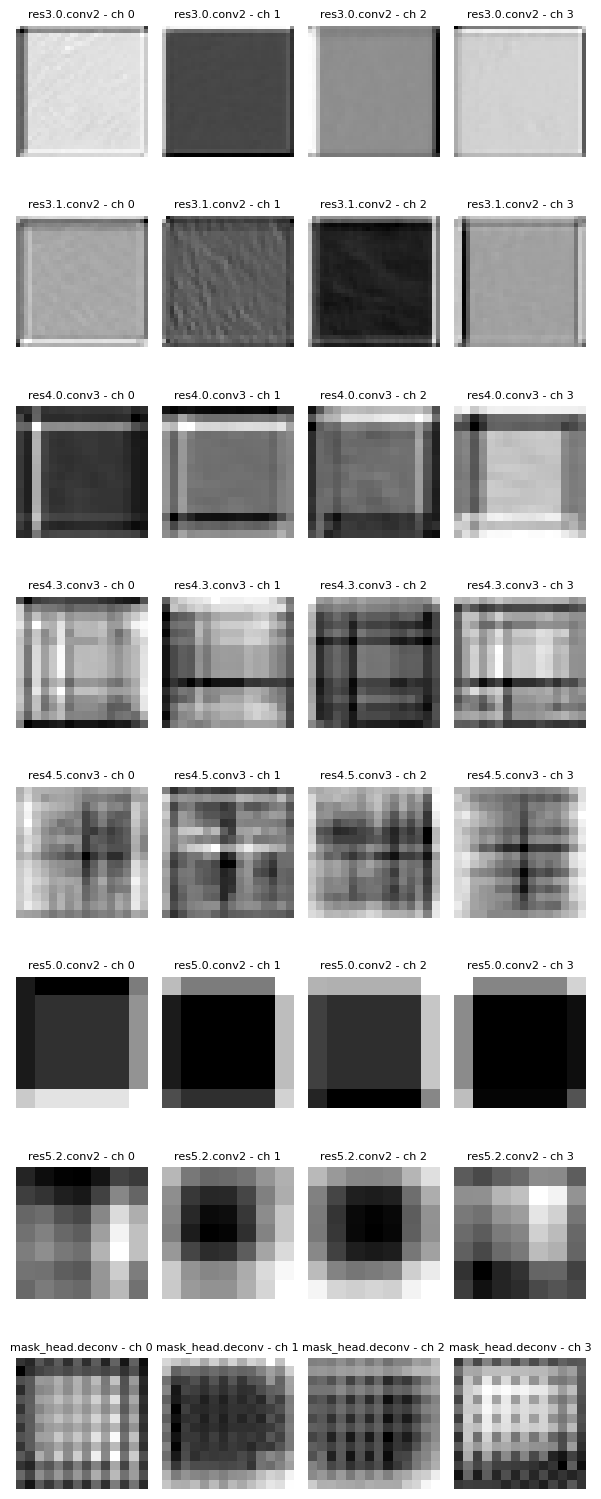

In [13]:
import matplotlib.pyplot as plt
import torch
from detectron2.data.detection_utils import read_image
import torchvision.transforms as T

# === Activation Capture ===
activations = {}

def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach().cpu()
    return hook

# Register hooks starting from res3
model.backbone.res3[0].conv1.register_forward_hook(get_activation("res3.0.conv1"))
model.backbone.res3[0].conv2.register_forward_hook(get_activation("res3.0.conv2"))
model.backbone.res3[1].conv2.register_forward_hook(get_activation("res3.1.conv2"))

model.backbone.res4[0].conv3.register_forward_hook(get_activation("res4.0.conv3"))
model.backbone.res4[3].conv3.register_forward_hook(get_activation("res4.3.conv3"))
model.backbone.res4[5].conv3.register_forward_hook(get_activation("res4.5.conv3"))

model.roi_heads.res5[0].conv2.register_forward_hook(get_activation("res5.0.conv2"))
model.roi_heads.res5[2].conv2.register_forward_hook(get_activation("res5.2.conv2"))

model.roi_heads.mask_head.deconv.register_forward_hook(get_activation("mask_head.deconv"))
# Convert activations dict to list and remove unwanted layers
activation_items = list(activations.items())

# Remove first 3 rows (early layers) and last one (mask_head.predictor)
activation_items = activation_items[3:-1]  # keep only the middle part

# === Load Image ===
filename = "5590794833131694"
img_path = f"/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/test_imgs/{filename}.png"
img = read_image(img_path, format="BGR")
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((256, 256)),
    T.ToTensor()
])
img_tensor = transform(img[:, :, ::-1]).cuda().unsqueeze(0)

# === Run Model ===
inputs = [{"image": img_tensor[0]}]
with torch.no_grad():
    _ = model(inputs)

# === Plotting ===
max_channels = 4
num_layers = len(activations)-4
fig_height = 2 * num_layers
fig, axes = plt.subplots(nrows=num_layers, ncols=max_channels, figsize=(6, fig_height))

if num_layers == 1:
    axes = axes[None, :]

activation_items = list(activations.items())[3:-1]

for row_idx, (layer_name, feature_map) in enumerate(activation_items):
    fmap = feature_map[0]  # (C, H, W)
    for ch_idx in range(max_channels):
        ax = axes[row_idx][ch_idx]
        if ch_idx < fmap.shape[0]:
            channel = fmap[ch_idx].numpy()
            # Normalize each channel
            norm = (channel - channel.min()) / (channel.max() - channel.min() + 1e-5)
            ax.imshow(norm, cmap="gray")
            ax.set_title(f"{layer_name} - ch {ch_idx}", fontsize=8)
        else:
            ax.axis("off")
        ax.axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.96)

plt.show()


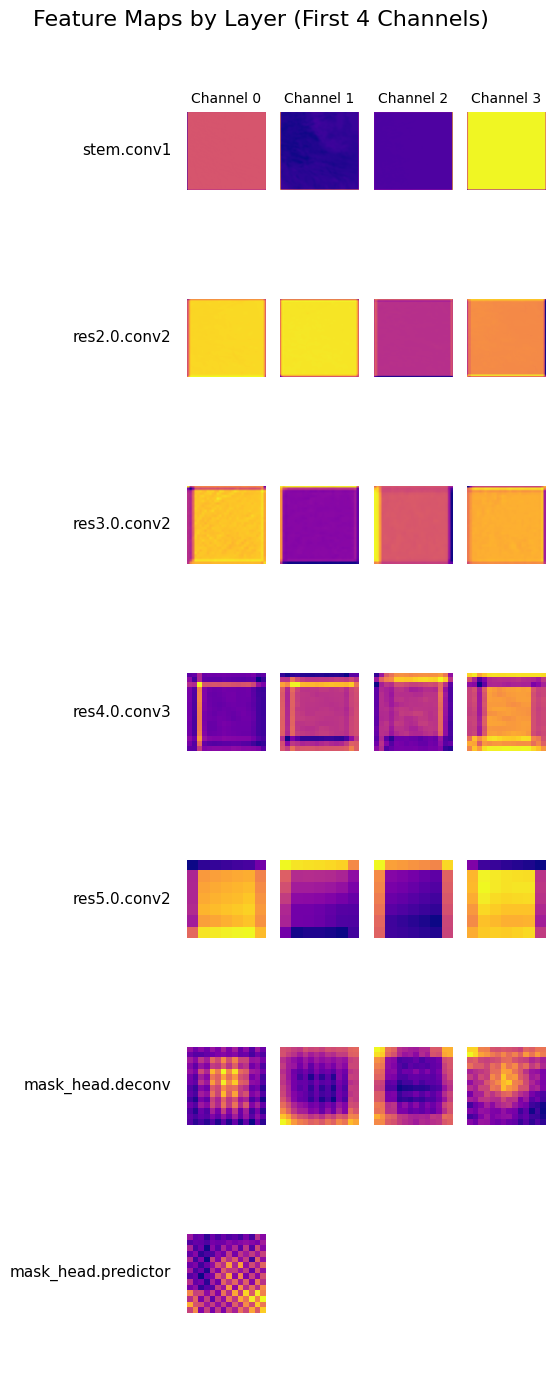

In [10]:
import matplotlib.pyplot as plt

# Optional: define friendly titles for Mask R-CNN layers
layer_titles = {
    "backbone_bottom_up_stem": "Stem (Backbone)",
    "res2": "Res2 Block",
    "res3": "Res3 Block",
    "res4": "Res4 Block",
    "res5": "Res5 Block",
    "fpn_lateral3": "FPN Lateral 3",
    "fpn_lateral4": "FPN Lateral 4",
    "fpn_output2": "FPN Output 2",
    "fpn_output3": "FPN Output 3",
    "fpn_output4": "FPN Output 4",
    "fpn_output5": "FPN Output 5",
    # Add more as needed
}

# Parameters
max_channels = 4
num_layers = len(activations)

# Create the figure
fig, axes = plt.subplots(nrows=num_layers, ncols=max_channels, figsize=(6, 2 * num_layers))

# Ensure axes is 2D
if num_layers == 1:
    axes = axes[None, :]

# Plot each layer
for row_idx, (layer_name, feature_map) in enumerate(activations.items()):
    fmap = feature_map[0]  # shape: (C, H, W)
    num_channels = min(max_channels, fmap.shape[0])

    for ch_idx in range(max_channels):
        ax = axes[row_idx][ch_idx]
        if ch_idx < num_channels:
            ax.imshow(fmap[ch_idx].cpu().numpy(), cmap="plasma")
        ax.axis("off")
        if row_idx == 0:
            ax.set_title(f"Channel {ch_idx}", fontsize=10)

    # Add layer label on the left of the first subplot in the row
    label = layer_titles.get(layer_name, layer_name)
    axes[row_idx][0].text(-0.2, 0.5, label, transform=axes[row_idx][0].transAxes,
                          fontsize=11, va='center', ha='right', rotation=0)

# Adjust layout
plt.tight_layout(rect=[0.05, 0, 1, 0.96])
plt.suptitle("Feature Maps by Layer (First 4 Channels)", fontsize=16)
plt.show()


In [29]:
import torch.nn.functional as F

def entropy(x):
    probs = F.softmax(x.view(-1), dim=0)
    return -(probs * torch.log(probs + 1e-6)).sum().item()

for layer_name, fmap in activations.items():
    h = entropy(fmap[0])
    print(f"{layer_name} entropy: {h:.4f}")


stem.conv1 entropy: 9.7586
res2.0.conv2 entropy: 9.5771
res3.0.conv2 entropy: 9.2023
res4.0.conv3 entropy: 0.1055
res5.0.conv2 entropy: 9.9886
mask_head.deconv entropy: 10.3037
mask_head.predictor entropy: 5.2779


In [31]:
for layer_name, fmap in activations.items():
    fmap = fmap[0]  # shape: [C, H, W]
    mean_val = torch.mean(fmap).item()
    std_val = torch.std(fmap).item()
    sparsity = torch.sum(fmap == 0).item() / fmap.numel()
    print(f"{layer_name}: mean={mean_val:.4f}, std={std_val:.4f}, sparsity={sparsity:.4f}")


stem.conv1: mean=1.1847, std=2.3505, sparsity=0.0000
res2.0.conv2: mean=0.7414, std=1.4105, sparsity=0.0000
res3.0.conv2: mean=0.0441, std=1.1808, sparsity=0.0000
res4.0.conv3: mean=-0.2860, std=1.0075, sparsity=0.0000
res5.0.conv2: mean=-0.2075, std=0.5096, sparsity=0.0000
mask_head.deconv: mean=0.3284, std=0.5100, sparsity=0.0000
mask_head.predictor: mean=0.0008, std=0.0045, sparsity=0.0000


In [32]:
for layer_name, fmap in activations.items():
    channel_means = torch.mean(fmap[0], dim=(1, 2))  # [C]
    diversity = torch.std(channel_means).item()
    print(f"{layer_name}: channel diversity (std of mean activations) = {diversity:.4f}")


stem.conv1: channel diversity (std of mean activations) = 2.3431
res2.0.conv2: channel diversity (std of mean activations) = 1.3764
res3.0.conv2: channel diversity (std of mean activations) = 0.9751
res4.0.conv3: channel diversity (std of mean activations) = 0.7894
res5.0.conv2: channel diversity (std of mean activations) = 0.4470
mask_head.deconv: channel diversity (std of mean activations) = 0.4471
mask_head.predictor: channel diversity (std of mean activations) = nan


# Model outputs

documentation: https://detectron2.readthedocs.io/en/latest/tutorials/models.html#model-output-format

In [18]:

random_file_path = '/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/image6.png'


im=cv2.imread(random_file_path)
outputs = predictor(im)
probab_mask=get_predicted_mask_scores(outputs)
pred_mask=get_predicted_mask(outputs)
np.save('./image6mask.npy',np.array(pred_mask))
plt.imshow(probab_mask, cmap=plt.cm.jet, vmin=0, vmax=1)

plt.colorbar()  # Add color bar to show the mapping of colors to values
plt.title('Probability Mask Heatmap')
plt.axis('off')
plt.show()



[ WARN:0@2005.950] global loadsave.cpp:248 findDecoder imread_('/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/image6.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
print(outputs.keys())
num_val=len(outputs['instances'])
print(num_val)
print(dir(outputs['instances']))
print(outputs['instances']._fields.keys())

In [ ]:
print(outputs['instances']._fields['scores'][0].item())

In [ ]:

mask_tensor=outputs['instances']._fields['pred_masks'][0]
mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
mask_numpy = mask_cpu.numpy()
print(mask_numpy)
plt.imshow(mask_numpy)

In [10]:
def recall_function(pred_mask,true_mask):
    intersection=np.logical_and(pred_mask,true_mask).astype(np.uint8)
    true_positives = intersection.sum()


    positives=true_mask.sum()

    return true_positives / positives 
def precision_function(pred_mask,true_mask):
    intersection=np.logical_and(pred_mask,true_mask).astype(np.uint8)
    true_positives = intersection.sum()


    predicted=pred_mask.sum()

    return true_positives / predicted 

from metrics import *

In [11]:
def dilate_mask2(mask, num_it, kernel_size):
    # Check the data type
    if mask.dtype != np.uint8:
        # Convert to uint8 if necessary
        mask = mask.astype(np.uint8)

    # Check the shape and ensure it's a single-channel (grayscale) image
    if len(mask.shape) == 2:
        # Add a third dimension to indicate it's a single-channel image
        mask = mask[:, :, np.newaxis]

    # Define a smaller kernel for dilation
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Apply dilation
    dilation = cv2.dilate(mask, kernel, iterations=num_it)
    return dilation

In [10]:
from open_contrails_tools import *
def get_predicted_mask(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    pred_mask=np.zeros((256,256))
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()
        pred_mask=np.logical_or(pred_mask,mask_numpy)
    return pred_mask.astype(np.uint8)


def get_predicted_mask_scores(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    all_scores=outputs['instances']._fields['scores']
    probab_mask_total=np.zeros((256,256))
    total=len(all_masks_tensors)
    print(total)
    for i in range(len(all_masks_tensors)):
        print(i)
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()

        mask_score=all_scores[i].cpu().numpy()

        probab_mask=mask_score*mask_numpy

        probab_mask_total+=probab_mask
        probab_mask_total[probab_mask_total>1]=1


    return probab_mask_total

target_filepath='/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/oc_mrcnn3/val/images/'
#target_filepath='/home/irortiza/Pictures/MSG_CROPS/20220102/0000/'
# List all files in the directory



In [ ]:
target_filepath='/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/oc_mrcnn3/val/images/'

all_files = os.listdir(target_filepath)
random.seed()
random_file = random.choice(all_files)
print(random_file)
from hough_tools import *
# Create the full path to the randomly selected file
random_file_path = os.path.join(target_filepath, random_file)
im=cv2.imread(random_file_path)
outputs = predictor(im)
pred_mask=get_predicted_mask(outputs)
probab_mask=get_predicted_mask_scores(outputs)
#pred_mask=dilate_mask2(pred_mask,1,2)

path='/home/irortiza/Documents/contrails_detection/E-contrail/GOOGLEDATASET/validation'
fullname=random_file.split('.')[0]
num=os.listdir(path).index(fullname)
binary_mask=np.transpose(get_binary_mask('validation',num))
fig, ax = plt.subplots(1,4,figsize=(17,8))
ax[0].imshow(binary_mask, cmap='gray')
ax[0].set_title('Ground Truth Labels')
ax[0].axis('off')

ax[2].imshow(pred_mask, cmap='gray')
ax[2].set_title('All Predictions')
ax[2].axis('off')

ax[1].imshow(np.logical_and(pred_mask,binary_mask), cmap='gray')
ax[1].set_title('True Positive Predictions')
ax[1].axis('off')

ax[3].imshow(im)
ax[3].set_title('Original image')
ax[3].axis('off')



plt.show()
# Metrics
file_iou=calculate_iou(pred_mask, binary_mask)
file_dice=dice_coefficient(pred_mask,binary_mask)
file_recall=recall_function(pred_mask,binary_mask)
file_precision=precision_function(pred_mask,binary_mask)

print(f'DICE SCORE: {round(file_dice*100,2)}%')
print(f'RECALL: {round(file_recall*100,2)}%')
print(f'PRECISION: {round(file_precision*100,2)}%')

In [ ]:
from matplotlib.colors import LogNorm
probab_mask=get_predicted_mask_scores(outputs)
plt.imshow(probab_mask, cmap=plt.cm.jet, vmin=0, vmax=1)

plt.colorbar()  # Add color bar to show the mapping of colors to values
plt.title('Probability Mask Heatmap')
plt.axis('off')
plt.show()



In [ ]:
target_filepath='/home/irortiza/Pictures/MSG3_CROPS/20240126/EGU_TESTS'
def get_predicted_mask_scores(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    all_scores=outputs['instances']._fields['scores']
    probab_mask_total=np.zeros((128,128))
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()

        mask_score=all_scores[i].cpu().numpy()

        probab_mask=mask_score*mask_numpy

        probab_mask_total+=probab_mask
        probab_mask_total[probab_mask_total>1]=1


    return probab_mask_total
def get_predicted_mask(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    pred_mask=np.zeros((128,128))
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()
        pred_mask=np.logical_or(pred_mask,mask_numpy)
    return pred_mask.astype(np.uint8)


all_files = os.listdir(target_filepath)
random.seed()
random_file = random.choice(all_files)
print(random_file)
from hough_tools import *
# Create the full path to the randomly selected file
random_file_path = os.path.join(target_filepath, random_file)
im=cv2.imread(random_file_path)
outputs = predictor(im)
pred_mask=get_predicted_mask(outputs)
probab_mask=get_predicted_mask_scores(outputs)

fig, ax = plt.subplots(1,2,figsize=(17,8))
ax[0].imshow(im)
ax[0].set_title('Image')
ax[0].axis('off')

ax[1].imshow(probab_mask, cmap=plt.cm.jet, vmin=0, vmax=1)
ax[1].set_title('All Predictions')
ax[1].axis('off')

plt.show()

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from hough_tools import *  # Assuming you have a custom module named hough_tools

# Function to overlay mask on image
def overlay_mask(image, mask, alpha=0.5):
    overlaid_image = image.copy()
    overlaid_image[mask > 0] = (0, 0, 255)  # Overlay mask in red color
    return cv2.addWeighted(image, 1-alpha, overlaid_image, alpha, 0)

# Assuming you have defined target_filepath and imported hough_tools correctly
all_files = os.listdir(target_filepath)
random.seed()
random_file = random.choice(all_files)
print(random_file)

# Create the full path to the randomly selected file
random_file_path = os.path.join(target_filepath, random_file)
im = cv2.imread(random_file_path)

# Process the image
outputs = predictor(im)
pred_mask = get_predicted_mask(outputs)
probab_mask = get_predicted_mask_scores(outputs)

# Overlay mask on the image
overlayed_image = overlay_mask(im, pred_mask)

# Plot the original image and overlayed image with mask
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
ax[0].imshow(im[:, :, ::-1])  # Convert BGR to RGB
ax[0].set_title('Image')
ax[0].axis('off')

ax[1].imshow(overlayed_image[:, :, ::-1])  # Convert BGR to RGB
ax[1].set_title('Image with Mask Overlay')
ax[1].axis('off')

plt.show()


In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
from hough_tools import *  # Assuming you have a custom module named hough_tools

# Function to create a fancy visualization of the probability mask
def visualize_probability_mask(prob_mask):
    cmap = plt.get_cmap('plasma')  # Choose colormap (you can change it)
    rgba_prob_mask = cmap(prob_mask)
    return rgba_prob_mask[:, :, :3]  # Discard alpha channel

# Assuming you have defined target_filepath and imported hough_tools correctly
all_files = os.listdir(target_filepath)
random.seed()
random_file = random.choice(all_files)
print(random_file)

# Create the full path to the randomly selected file
random_file_path = os.path.join(target_filepath, random_file)
im = cv2.imread(random_file_path)

# Process the image
outputs = predictor(im)
pred_mask = get_predicted_mask(outputs)
probab_mask = get_predicted_mask_scores(outputs)

# Find contours in the mask
contours, _ = cv2.findContours(pred_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the image
contour_image = im.copy()
for i, contour in enumerate(contours):
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 1)  # thinner contours
    # Add label "contrail" next to contour with smaller font size
    #contour_label_position = tuple(contour[0][0])  # Position of the first point of the contour
    #cv2.putText(contour_image, 'Contrail', contour_label_position, cv2.FONT_HERSHEY_DUPLEX, 0.3, (255, 255, 255), 1)

# Plot the original image with contours and labels
plt.figure(figsize=(10, 8))
plt.imshow(contour_image[:, :, ::-1])  # Convert BGR to RGB
plt.title('Image with Contours and Labels')
plt.axis('off')
plt.show()


In [ ]:
im = cv2.imread('/home/irortiza/Pictures/MSG3_CROPS/20240126/full_scenes/0630.png')
def get_predicted_mask(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    pred_mask=np.zeros(all_masks_tensors[0].shape)
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()
        pred_mask=np.logical_or(pred_mask,mask_numpy)
    return pred_mask.astype(np.uint8)
# Process the image
outputs = predictor(im)
pred_mask = get_predicted_mask(outputs)
def get_predicted_mask_scores(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    all_scores=outputs['instances']._fields['scores']
    probab_mask_total=np.zeros(all_masks_tensors[0].shape)
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()

        mask_score=all_scores[i].cpu().numpy()

        probab_mask=mask_score*mask_numpy

        probab_mask_total+=probab_mask
        probab_mask_total[probab_mask_total>1]=1


    return probab_mask_total
probab_mask=get_predicted_mask_scores(outputs)
binary=(probab_mask>0.6).astype(np.uint8)

# Find contours in the mask
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the image
contour_image = im.copy()
for i, contour in enumerate(contours):
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 255), 2)  # thinner contours
    # Add label "contrail" next to contour with smaller font size
    #contour_label_position = tuple(contour[0][0])  # Position of the first point of the contour
    #cv2.putText(contour_image, 'Contrail', contour_label_position, cv2.FONT_HERSHEY_DUPLEX, 0.3, (255, 255, 255), 1)

# Plot the original image with contours and labels
plt.figure(figsize=(10, 8))
plt.imshow(contour_image[:, :, ::-1])  # Convert BGR to RGB
plt.title('Image with Contours and Labels')
plt.axis('off')
plt.show()

## The good one

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define sliding window function
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1] + 1, step_size):
        for x in range(0, image.shape[1] - window_size[0] + 1, step_size):
            yield x, y, image[y:y + window_size[1], x:x + window_size[0]]

# Predict masks using sliding window and draw contours on full scene
im = cv2.imread('/home/irortiza/Pictures/MSG3_CROPS/20240126/full_scenes/0630.png')

# Define sliding window parameters
window_size = (100, 100)
step_size = 64  # Adjust step size as needed for overlap

# Iterate over sliding windows
for x, y, window in sliding_window(im, step_size, window_size):
    # Process the window image

    outputs = predictor(window)
    print(outputs['instances']._fields['pred_masks'][0])
    #pred_mask = get_predicted_mask(outputs)

    # Find contours in the mask
    probab_mask=get_predicted_mask_scores(outputs)
    binary=(probab_mask>0.9).astype(np.uint8)

    # Find contours in the mask
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    # Draw contours on the original full image
    for contour in contours:
        # Transform contour coordinates to the full image coordinate system
        transformed_contour = contour + np.array([x, y])

        # Draw transformed contour on the full image
        cv2.drawContours(im, [transformed_contour], -1, (0, 0, 255), 1,lineType=cv2.LINE_AA)

# Plot the original image with contours from all tiles
plt.figure(figsize=(16, 12))
plt.imshow(im[:, :, ::-1])  # Convert BGR to RGB
title_text = r'DETECTED CONTRAILS'
plt.title(title_text, fontsize=25, fontfamily='serif')
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define sliding window function
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1] + 1, step_size):
        for x in range(0, image.shape[1] - window_size[0] + 1, step_size):
            yield x, y, image[y:y + window_size[1], x:x + window_size[0]]


# Dummy function to extract predicted mask scores (replace with your actual function)
def get_predicted_mask_scores(outputs):
    return outputs['instances']['_fields']['pred_masks'][0]

# Load image
im = cv2.imread('/home/irortiza/Pictures/MSG3_CROPS/20240126/full_scenes/0630.png')

# Define sliding window parameters
window_size = (100, 100)
step_size = 64  # Adjust step size as needed for overlap

# Iterate over sliding windows
for x, y, window in sliding_window(im, step_size, window_size):
    # Process the window image
    outputs = predictor(window)

    # Check if the mask array is not empty
    if len(outputs['instances']._fields['pred_masks']) == 0:
        continue  # Skip this window if no masks are found

    # Get the predicted mask scores
    probab_mask = get_predicted_mask_scores(outputs)

    # Convert the probability mask to binary using a threshold
    binary = (probab_mask > 0.9).astype(np.uint8)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original full image
    for contour in contours:
        # Transform contour coordinates to the full image coordinate system
        transformed_contour = contour + np.array([x, y])

        # Draw transformed contour on the full image
        cv2.drawContours(im, [transformed_contour], -1, (0, 0, 255), 1, lineType=cv2.LINE_AA)

# Plot the original image with contours from all tiles
plt.figure(figsize=(16, 12))
plt.imshow(im[:, :, ::-1])  # Convert BGR to RGB
plt.title('DETECTED CONTRAILS', fontsize=25, fontfamily='serif')
plt.axis('off')
plt.show()


## GIF OF DETECTIONS

In [20]:
import os
import cv2
import numpy as np
from PIL import Image

# Define sliding window function
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1] + 1, step_size):
        for x in range(0, image.shape[1] - window_size[0] + 1, step_size):
            yield x, y, image[y:y + window_size[1], x:x + window_size[0]]

# Function to draw contours on the image
def draw_contours(im):
    # Define sliding window parameters
    window_size = (250, 250)
    step_size = 64  # Adjust step size as needed for overlap

    # Iterate over sliding windows
    for x, y, window in sliding_window(im, step_size, window_size):
        # Process the window image
        outputs = predictor(window)
        probab_mask = get_predicted_mask_scores(outputs)
        binary = (probab_mask > 0.9).astype(np.uint8)

        # Find contours in the mask
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours on the original full image
        for contour in contours:
            # Transform contour coordinates to the full image coordinate system
            transformed_contour = contour + np.array([x, y])

            # Draw transformed contour on the full image
            cv2.drawContours(im, [transformed_contour], -1, (0, 255, 255), 1, lineType=cv2.LINE_AA)

    return im


In [19]:
def sliding_window(image, step_size, window_size):
    height, width = image.shape[:2]
    
    # Define ranges for y and x based on the first three quadrants
    y_range = range(0, height // 2, step_size)  # Iterate over top half of the image
    x_range = range(0, width // 2, step_size)   # Iterate over left half of the image
    
    for y in y_range:
        for x in x_range:
            yield x, y, image[y:y + window_size[1], x:x + window_size[0]]


### GENERATE AND SAVE GIF

In [ ]:
from PIL import Image, ImageDraw, ImageFont
from datetime import datetime, timedelta
from tqdm import tqdm
# Path to directory containing image sequence
sequence_dir = '/home/irortiza/Pictures/MSG3_CROPS/20230925/full_scenes/'

# Output directory for saving frames and GIF
output_dir = '/home/irortiza/Pictures/MSG3_CROPS/20230925/'

# List all image files in the sequence directory
image_files = sorted([f for f in os.listdir(sequence_dir) if f.endswith('.png')])

# Create list to store frames for GIF
frames = []

# Start time for the GIF
start_time = datetime.strptime('00:00', '%H:%M')

# Process each image in the sequence
for i, image_file in tqdm(enumerate(image_files)):
    # Read image
    image_path = os.path.join(sequence_dir, image_file)
    im = cv2.imread(image_path)

    # Draw contours on the image
    im_with_contours = draw_contours(im)

    # Convert image to PIL format
    pil_image = Image.fromarray(cv2.cvtColor(im_with_contours, cv2.COLOR_BGR2RGB))

    # Create a drawing context
    draw = ImageDraw.Draw(pil_image)

    # Add time to the frame
    current_time = (start_time + timedelta(minutes=i * 15)).strftime('%H:%M')
    
    # Specify font and size

    font = ImageFont.truetype(font='/home/irortiza/Downloads/Verdana_Bold.ttf', size=19)
    draw.text((10, 10), f"Contrail Detection with Final Model \n25th of September 2023 \n{current_time}:00", fill=(255, 255, 255), font=font, width=97)

    # Append image to frames list
    frames.append(pil_image)
    # Add title to the GIF


    # Append image to frames list
    frames.append(pil_image)

# Save frames as GIF
gif_path = os.path.join(output_dir, 'contours_visualization_final25_09.gif')
frames[0].save(gif_path, save_all=True, append_images=frames[1:], loop=0, duration=100)

print("GIF saved successfully at:", gif_path)


### SAVE FULL IMAGE MASKS

In [ ]:
from PIL import Image, ImageDraw, ImageFont
from datetime import datetime, timedelta
from tqdm import tqdm

import numpy as np

def generate_BIG_probability_mask(im):
    # Define sliding window parameters
    window_size = (200, 200)
    step_size = 64  # Adjust step size as needed for overlap

    # Initialize a blank mask to accumulate probability scores
    im_height, im_width = im.shape[:2]
    probability_mask = np.zeros((im_height, im_width), dtype=np.float32)

    # Iterate over sliding windows
    for x, y, window in sliding_window(im, step_size, window_size):
        # Process the window image
        outputs = predictor(window)
        probab_mask = get_predicted_mask_scores(outputs)

        # Calculate window coordinates in the full image
        x_end = min(x + window_size[1], im_width)
        y_end = min(y + window_size[0], im_height)

        # Accumulate probability mask for the window region
        probability_mask[y:y_end, x:x_end] += probab_mask[:y_end - y, :x_end - x]

    # Threshold the accumulated probability mask
    probability_mask[probability_mask > 1] = 1.0
    probability_mask[probability_mask <= 0] = 0.0

    return probability_mask

# Path to directory containing image sequence
sequence_dir = '/home/irortiza/Pictures/MSG3_CROPS/20230925/full_scenes/'

# Output directory for saving frames and GIF
output_dir = '/home/irortiza/Pictures/MSG3_CROPS/20230925/PROBAB_MASKS_MRCNN'

# List all image files in the sequence directory
image_files = sorted([f for f in os.listdir(sequence_dir) if f.endswith('.png')])

# Create list to store frames for GIF
frames = []

# Start time for the GIF
start_time = datetime.strptime('00:00', '%H:%M')

# Process each image in the sequence
for i, image_file in tqdm(enumerate(image_files)):
    NAME=image_file.split('.')[0]
    # Read image
    image_path = os.path.join(sequence_dir, image_file)
    im = cv2.imread(image_path)

    MASK=generate_BIG_probability_mask(im)
    save_path=os.path.join(output_dir,NAME+'.npy')
    np.save(save_path,MASK)
    print(save_path)



### Filter static objects

In [ ]:
times_list = []
for hour in range(0, 12):
    for minute in range(0, 60, 15):
        time_str = f"{hour:02d}{minute:02d}"
        times_list.append(time_str)

contours_per_frame={}
for time in tqdm(times_list):
    im = cv2.imread(f'/home/irortiza/Pictures/MSG3_CROPS/20240126/full_scenes/{time}.png')

    # Define sliding window parameters
    window_size = (100, 100)
    step_size = 64  # Adjust step size as needed for overlap

    # Iterate over sliding windows
    for x, y, window in sliding_window(im, step_size, window_size):
        # Process the window image
        outputs = predictor(window)
        pred_mask = get_predicted_mask(outputs)

        # Find contours in the mask
        probab_mask=get_predicted_mask_scores(outputs)
        binary=(probab_mask>0.9).astype(np.uint8)

        # Find contours in the mask
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        new_conts=[]
        # Draw contours on the original full image
        for contour in contours:
            # Transform contour coordinates to the full image coordinate system
            transformed_contour = contour + np.array([x, y])
            new_conts.append(transformed_contour)

    contours_per_frame[time]=new_conts

print(contours_per_frame['0000'][0])


In [ ]:
import math

def average_distance(coords1, coords2):
    num_points = min(len(coords1), len(coords2))  # Consider minimum length
    
    total_distance = 0.0
    
    # Sort coordinates to ensure corresponding points are matched correctly
    coords1.sort()
    coords2.sort()
    
    for i in range(num_points):
        x1, y1 = coords1[i]
        x2, y2 = coords2[i]
        total_distance += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    return total_distance / num_points

def find_closest_polygon(frame_contours, prev_contours):
    closest_pairs = []
    for cont1 in frame_contours:

        min_distance = float('inf')
        closest_contour = None
        for cont2 in prev_contours:
            distance = average_distance(cont1[0], cont2[0])
            if distance < min_distance:
                min_distance = distance
                closest_contour = cont2
        closest_pairs.append((cont1, closest_contour))
    return closest_pairs

# Assuming contours_per_frame is a dictionary with frame number as key and contours as value
# and static_contours is a list of contours that remain static throughout the sequence

static_contours = []
prev_contours = None

for time, contours in tqdm(contours_per_frame.items()):
    if prev_contours is None:
        prev_contours = contours
        continue
    
    closest_pairs = find_closest_polygon(contours, prev_contours)
    
    # Check if a polygon remains static throughout the sequence
    for pair in closest_pairs:
        if pair[1] and pair[0] == pair[1]:
            if pair[0] not in static_contours:
                static_contours.append(pair[0])
    
    prev_contours = contours

# Remove static contours from each time step
for time, contours in tqdm(contours_per_frame.items()):
    contours_per_frame[time] = [cont for cont in contours if cont not in static_contours]


In [ ]:
print(contours_per_frame['0000'])

In [ ]:
def average_distance(coords1, coords2):
    num_points = min(len(coords1), len(coords2))  # Consider minimum length
    
    total_distance = 0.0
    
    # Sort coordinates to ensure corresponding points are matched correctly
    coords1.sort()
    coords2.sort()
    
    for i in range(num_points):
        x1, y1 = coords1[i]
        x2, y2 = coords2[i]
        total_distance += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    return total_distance / num_points

for time,contours in contours_per_frame.items():
    for cont in contours


In [ ]:

for time,contours in contours_per_frame.items():
    for cont in 
          # Draw transformed contour on the full image
            cv2.drawContours(im, [transformed_contour], -1, (0, 0, 255), 1,lineType=cv2.LINE_AA)

In [ ]:
def get_predicted_masks_list(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    all_scores=outputs['instances']._fields['scores']
    probab_mask_total=[]
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()

        mask_score=all_scores[i].cpu().numpy()

        probab_mask=(mask_score*mask_numpy>0.9).astype(np.uint8)

        probab_mask_total.append(probab_mask)



    return probab_mask_total

probab_masks={}
start_time = datetime.strptime('00:00', '%H:%M')

# Process each image in the sequence
for i, image_file in tqdm(enumerate(image_files)):
    # Read image
    image_path = os.path.join(sequence_dir, image_file)
    im = cv2.imread(image_path)

    # Add time to the frame
    current_time = (start_time + timedelta(minutes=i * 15)).strftime('%H:%M')
    probab_masks[current_time]=

    # Draw contours on the image
    im_with_contours = draw_contours(im)

    # Convert image to PIL format
    pil_image = Image.fromarray(cv2.cvtColor(im_with_contours, cv2.COLOR_BGR2RGB))

    # Create a drawing context
    draw = ImageDraw.Draw(pil_image)



In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from IPython.display import display, Image as IPImage
import io
from tqdm import tqdm  # Import tqdm

# Define sliding window function
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1] + 1, step_size):
        for x in range(0, image.shape[1] - window_size[0] + 1, step_size):
            yield x, y, image[y:y + window_size[1], x:x + window_size[0]]

# Function to draw contours on the image
def draw_contours(im):
    # Define sliding window parameters
    window_size = (250, 250)
    step_size = 64  # Adjust step size as needed for overlap

    # Iterate over sliding windows
    for x, y, window in sliding_window(im, step_size, window_size):
        # Process the window image
        outputs = predictor(window)
        probab_mask = get_predicted_mask_scores(outputs)
        binary = (probab_mask > 0.9).astype(np.uint8)

        # Find contours in the mask
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours on the original full image
        for contour in contours:
            # Transform contour coordinates to the full image coordinate system
            transformed_contour = contour + np.array([x, y])

            # Draw transformed contour on the full image
            cv2.drawContours(im, [transformed_contour], -1, (0, 0, 255), 1, lineType=cv2.LINE_AA)

    return im

# Function to filter static contours
def filter_static_contours(all_frame_contours):
    filtered_contours = []

    for frame_index, contours in enumerate(all_frame_contours):
        # Initialize a list to store distances of each contour in the current frame with contours in following frames
        distances = []

        # Iterate over each contour in the current frame
        for contour in contours:
            # Initialize a list to store distances of the current contour with contours in following frames
            contour_distances = []

            # Iterate over the following frames
            for following_frame_contours in all_frame_contours[frame_index + 1:]:
                # Calculate distances between the current contour and contours in the following frames
                frame_distances = [cv2.matchShapes(contour, c, cv2.CONTOURS_MATCH_I1, 0.0) for c in following_frame_contours]

                # If there are distances calculated (i.e., there are contours in the following frames)
                if frame_distances:
                    # Take the minimum distance as the distance to the closest contour in the following frames
                    min_distance = min(frame_distances)
                    contour_distances.append(min_distance)

            # If distances with following contours are very small and more or less constant, consider the contour as static
            if contour_distances and max(contour_distances) - min(contour_distances) < 15:
                continue  # Skip this contour
            else:
                filtered_contours.append(contour)  # Otherwise, add the contour to the filtered list

    return filtered_contours

# Path to directory containing image sequence
sequence_dir = '/home/irortiza/Pictures/MSG3_CROPS/20240126/full_scenes/'

# List all image files in the sequence directory
image_files = sorted([f for f in os.listdir(sequence_dir) if f.endswith('.png')])

# Initialize a list to store contours of each frame
all_frame_contours = []

# Process each image in the sequence
for image_file in tqdm(image_files):
    # Read image
    image_path = os.path.join(sequence_dir, image_file)
    im = cv2.imread(image_path)

    # Find contours and draw them on the image
    contours = draw_contours(im)

    # Store contours of the current frame
    all_frame_contours.append(contours)

# Filter static contours across frames
filtered_contours = filter_static_contours(all_frame_contours)

# Create list to store frames for GIF
import imageio
from PIL import ImageDraw, ImageFont

# Function to add timestamp and title to each frame
def add_timestamp_and_title(image, timestamp, title):
    # Convert image to PIL format
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Add timestamp
    draw = ImageDraw.Draw(pil_image)
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20)
    draw.text((pil_image.width - 150, 10), timestamp, fill=(255, 255, 255), font=font)

    # Add title
    draw.text((10, 10), title, fill=(255, 255, 255), font=font)

    # Convert back to OpenCV format
    image_with_timestamp = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

    return image_with_timestamp

# Create list to store frames for GIF
frames = []

# Time parameters
start_time = 0
time_increment = 15  # in minutes

# Process each image in the sequence again to draw filtered contours
for image_file, contours in tqdm(zip(image_files, filtered_contours)):
    # Read image
    image_path = os.path.join(sequence_dir, image_file)
    im = cv2.imread(image_path)

    # Draw contours on the image
    im_with_contours = draw_contours(im)

    # Generate timestamp
    current_time = "{:02d}:{:02d}".format(start_time // 60, start_time % 60)
    start_time += time_increment

    # Add timestamp and title
    im_with_text = add_timestamp_and_title(im_with_contours, current_time, "Title")

    # Append to frames list
    frames.append(im_with_text)

# Save frames as GIF
gif_path = '/home/irortiza/Pictures/MSG3_CROPS/20240126/contours_visualization_nostatic.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], loop=0, duration=100)  # Adjust duration as needed

print("GIF saved successfully at:", gif_path)


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def tile_to_image_coordinate(tile_name, tile_coordinate, tile_size):
    # Parse tile name to extract tile indices
    tile_indices = tile_name.split('_')[1:3]
    print(tile_indices)

# Convert the string representation of the indices to integers
    index_1 = int(tile_indices[0])
    index_2 = int(tile_indices[1].split('.')[0])


    # Calculate absolute position of the tile in the whole image
    tile_abs_start_y = index_1 * tile_size
    tile_abs_start_x = index_2* tile_size

    # Calculate absolute position of the coordinate in the whole image
    tile_coord_y, tile_coord_x = tile_coordinate
    coord_abs_y = tile_abs_start_y + tile_coord_y
    coord_abs_x = tile_abs_start_x + tile_coord_x
    print(tile_coord_y, tile_coord_x)
    print(coord_abs_y,coord_abs_x)

    return coord_abs_y, coord_abs_x
def get_predicted_mask(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    pred_mask=np.zeros(all_masks_tensors[0].shape)
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()
        pred_mask=np.logical_or(pred_mask,mask_numpy)
    return pred_mask.astype(np.uint8)
# Assuming you have already loaded 'random_file' and performed prediction to get 'pred_mask'
# Iterate over each tile
im=cv2.imread('/home/irortiza/Pictures/MSG3_CROPS/20240126/full_scenes/0600.png')
images={}
p='/home/irortiza/Pictures/MSG3_CROPS/20240126/0800'
for tile in os.listdir(p):
    name=tile.split('.')[0]
    images[tile]=cv2.imread(os.path.join(p,tile))

for tile_name, tile_image in images.items():
    print(tile_name)

    tile_height, tile_width, _ = tile_image.shape
    tile_size = min(tile_height, tile_width) 
    # Process the tile image
    outputs = predictor(tile_image)
    pred_mask = get_predicted_mask(outputs)

    # Find contours in the mask
    contours, _ = cv2.findContours(pred_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original full image
    for contour in contours:
        # Transform contour coordinates to the full image coordinate system
        transformed_contour = []
        for point in contour:

            x, y = point[0]
            full_image_coordinate = tile_to_image_coordinate(tile_name, (x, y), tile_size)
            transformed_contour.append([full_image_coordinate[1], full_image_coordinate[0]])  # Swap x, y

        # Convert to numpy array
        transformed_contour = np.array(transformed_contour)

        # Draw transformed contour on the full image
        cv2.drawContours(im, [transformed_contour], -1, (0, 255, 0), 1)

# Plot the original image with contours from all tiles
plt.figure(figsize=(10, 8))
plt.imshow(im[:, :, ::-1])  # Convert BGR to RGB
plt.title('Image with Contours from All Tiles')
plt.axis('off')
plt.show()


In [ ]:
im=cv2.imread('/home/irortiza/Pictures/MSG3_CROPS/20240126/full_scenes/0800.png')
images={}
p='/home/irortiza/Pictures/MSG3_CROPS/20240126/0800'
for tile in os.listdir(p):
    name=tile.split('.')[0]
    images[tile]=cv2.imread(os.path.join(p,tile))

tile_name, tile_image = next(iter(images.items()))


tile_height, tile_width, _ = tile_image.shape
tile_size = min(tile_height, tile_width) 
# Process the tile image
outputs = predictor(tile_image)
pred_mask = get_predicted_mask(outputs)

# Find contours in the mask
contours, _ = cv2.findContours(pred_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original full image
for contour in contours:
    # Transform contour coordinates to the full image coordinate system
    transformed_contour = []
    for point in contour:
        x, y = point[0]
        full_image_coordinate = tile_to_image_coordinate(tile_name, (x, y), tile_size)
        transformed_contour.append([full_image_coordinate[1], full_image_coordinate[0]])  # Swap x, y

    # Convert to numpy array
    transformed_contour = np.array(transformed_contour)

    # Draw transformed contour on the full image
    cv2.drawContours(im, [transformed_contour], -1, (0, 255, 0), 1)

# Plot the original image with contours from all tiles
plt.figure(figsize=(10, 8))
plt.imshow(im[:, :, ::-1])  # Convert BGR to RGB
plt.title('Image with Contours from All Tiles')
plt.axis('off')
plt.show()


In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
from hough_tools import *  # Assuming you have a custom module named hough_tools

# Function to create a fancy visualization of the probability mask
def visualize_probability_mask(prob_mask):
    cmap = plt.get_cmap('plasma')  # Choose colormap (you can change it)
    rgba_prob_mask = cmap(prob_mask)
    return rgba_prob_mask[:, :, :3]  # Discard alpha channel

# Assuming you have defined target_filepath and imported hough_tools correctly
all_files = os.listdir(target_filepath)
random.seed()
random_file = random.choice(all_files)
print(random_file)

# Create the full path to the randomly selected file
random_file_path = os.path.join(target_filepath, random_file)
im = cv2.imread(random_file_path)

# Process the image
outputs = predictor(im)
pred_mask = get_predicted_mask(outputs)
probab_mask = get_predicted_mask_scores(outputs)

# Find contours in the mask
contours, _ = cv2.findContours(pred_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the image with random colors
contour_image = im.copy()
for i, contour in enumerate(contours):
    # Generate random color
    color = tuple(np.random.randint(0, 256, 3).tolist())
    cv2.drawContours(contour_image, [contour], -1, color, 1)  # thinner contours
    # Add label "contrail" next to contour with smaller font size
    contour_label_position = tuple(contour[0][0])  # Position of the first point of the contour
    text_size, _ = cv2.getTextSize('Contrail', cv2.FONT_HERSHEY_DUPLEX, 0.3, 1)
    #cv2.rectangle(contour_image, (contour_label_position[0], contour_label_position[1] - text_size[1] - 2),
                  #(contour_label_position[0] + text_size[0] + 2, contour_label_position[1]), (0, 0, 0), -1)
    #cv2.putText(contour_image, 'Contrail', contour_label_position, cv2.FONT_HERSHEY_DUPLEX, 0.3, (255, 255, 255), 1)

# Plot the original image with contours and labels
plt.figure(figsize=(10, 8))
plt.imshow(contour_image[:, :, ::-1])  # Convert BGR to RGB
plt.title('Image with Contours and Labels')
plt.axis('off')
plt.show()


In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
from hough_tools import *  # Assuming you have a custom module named hough_tools

# Function to overlay mask on image
import cv2

def overlay_mask(image, mask, alpha=1):
    overlaid_image = image.copy()
    overlay_color = (0, 255, 0)  # Green color for the overlay

    # Apply mask to the overlaid image
    overlaid_image[mask > 0] = overlay_color

    # Adjust transparency using alpha
    result = cv2.addWeighted(image, 1 - alpha, overlaid_image, alpha, 0)

    return result


# Function to detect contours of connected components with Canny edge detection
def detect_contours(mask):
    edges = cv2.Canny(mask, 30, 100)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = np.zeros_like(mask)
    cv2.drawContours(contour_image, contours, -1, (255), thickness=1)
    return contour_image

# Assuming you have defined target_filepath and imported hough_tools correctly
all_files = os.listdir(target_filepath)
random.seed()
random_file = random.choice(all_files)
print(random_file)

# Create the full path to the randomly selected file
random_file_path = os.path.join(target_filepath, random_file)
im = cv2.imread(random_file_path)

# Process the image
outputs = predictor(im)
pred_mask = get_predicted_mask(outputs)
probab_mask = get_predicted_mask_scores(outputs)

# Overlay mask on the image
overlayed_image = overlay_mask(im, pred_mask)

# Detect contours of connected components with Canny edge detection
contour_image = detect_contours(pred_mask)

# Plot the original image, overlayed image with mask, and contours
fig, ax = plt.subplots(1, 3, figsize=(17, 8))
ax[0].imshow(im[:, :, ::-1])  # Convert BGR to RGB
ax[0].set_title('Image')
ax[0].axis('off')

ax[1].imshow(overlayed_image[:, :, ::-1])  # Convert BGR to RGB
ax[1].set_title('Image with Mask Overlay')
ax[1].axis('off')

ax[2].imshow(contour_image, cmap='gray')
ax[2].set_title('Contours of Connected Components')
ax[2].axis('off')

plt.show()



In [ ]:
output_dir = '/home/irortiza/Pictures/MSG3_CROPS/20240126/PROPAGATED_OVERLAYED'  # Replace 'output_directory' with the path to your output directory
PREDS= '/home/irortiza/Pictures/MSG3_CROPS/20240126/propagated_masks'
target_filepath='/home/irortiza/Pictures/MSG3_CROPS/20240126/EGU_TESTS'
# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

all_files=os.listdir(target_filepath)
# Process each image file
for image_file in all_files:
    print(image_file)
    yolo_img=cv2.imread(YOLO_PREDS+ f'/{image_file}')
    # Read the image
    image_path = os.path.join(target_filepath, image_file)
    image = cv2.imread(image_path)
    
    # Process the image
    outputs = predictor(image)
    pred_mask = get_predicted_mask(outputs)
    
    # Overlay mask on the image
    overlayed_image = overlay_mask(yolo_img, pred_mask)
    
    # Save the overlayed image
    output_file_path = os.path.join(output_dir, image_file)
    cv2.imwrite(output_file_path, overlayed_image)
    
    print(f"Overlayed image saved: {output_file_path}")

In [ ]:
import os
import cv2
import numpy as np

output_dir = '/home/irortiza/Pictures/MSG3_CROPS/20240126/PROPAGATED_OVERLAYED'  # Replace 'output_directory' with the path to your output directory
PREDS= '/home/irortiza/Pictures/MSG3_CROPS/20240126/propagated_masks'
target_filepath='/home/irortiza/Pictures/MSG3_CROPS/20240126/EGU_TESTS'
# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

all_files=os.listdir(target_filepath)
# Process each image file
for image_file in all_files:
    name=image_file.split('.')[0]+'.npy'
 
    # Read the image
    image_path = os.path.join(target_filepath, image_file)
    image = cv2.imread(image_path)
    

    pred_mask = np.load(os.path.join(PREDS,name))
    
    # Overlay mask on the image
    overlayed_image = overlay_mask(image, pred_mask)
    
    # Save the overlayed image
    output_file_path = os.path.join(output_dir, image_file)
    cv2.imwrite(output_file_path, overlayed_image)
    
    print(f"Overlayed image saved: {output_file_path}")

In [ ]:
new_img=np.dstack((im,probab_mask))
print(new_img.shape)
plt.imshow(new_img)

In [ ]:
def image_remove_back(image,mask_remove_back):
    # Convert images to NumPy arrays
    image_array = np.array(image)
    mask_array = np.array(mask_remove_back)
    mask_array = np.repeat(mask_array[:, :, np.newaxis], image_array.shape[2], axis=2)
    # Apply the modified condition to the image
    result_array = np.where(mask_array==0, 0, image_array)

    # Convert the result back to an image
    result_image = Image.fromarray(result_array.astype(np.uint8))
    return result_image
result_image=image_remove_back(im.astype(np.uint8),pred_mask)
plt.imshow(result_image)
plt.axis('off')

In [ ]:
# REPLACE 3 BAND BY MASK
def replace3band(image,mask_pred):
    # Convert images to NumPy arrays
    image_array = np.array(image)
    image[:,:,2]=mask_pred*255

    return image
image=replace3band(im,pred_mask)
plt.imshow(image)

# METRICS FOR THE WHOLE VAL SET

In [35]:
target_filepath='/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_mrcnn3/val/images/'
path='/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/GOOGLEDATASET/validation'
#target_filepath='/home/irortiza/Pictures/MSG_CROPS/20220102/0000/'
# List all files in the directory
from hough_tools import *
dice=0
recall=0
prec=0
all_files = os.listdir(target_filepath)
for file in all_files:
    # get the predicted mask
    file_path = os.path.join(target_filepath, file)
    im=cv2.imread(file_path)
    outputs = predictor(im)
    pred_mask=get_predicted_mask(outputs)
    pred_mask=dilate_mask(pred_mask,2)

    # get the true mask
    fullname=file.split('.')[0]
    num=os.listdir(path).index(fullname)
    binary_mask=np.transpose(get_binary_mask('validation',num))


    file_dice=dice_coefficient(pred_mask,binary_mask)
    file_recall=recall_function(pred_mask,binary_mask)
    file_precision=precision_function(pred_mask,binary_mask)

    dice+=file_dice
    recall+=file_recall
    prec+=file_precision


total=len(all_files)

dice/=total
recall/=total
prec/=total



print(f'The total dice is: {round(dice*100,2)}%')
print(f'The total recall is: {round(recall*100,2)}%')
print(f'The total precision is: {round(prec*100,2)}%')



FileNotFoundError: [Errno 2] No such file or directory: '/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_mrcnn3/val/images/'

# Generate OC_segmentstry_mini_withmask1
1
1

0

In [ ]:
target_filepath='/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/OC_segmentstry_mini_unet5/validation/images'
import os
import cv2
import numpy as np
from hough_tools import *
import shutil
from tifffile import imwrite

counter = 0
all_files = os.listdir(target_filepath)

for file in all_files:
    # Get the predicted mask
    file_path = os.path.join(target_filepath, file)
    im = cv2.imread(file_path).astype(np.uint8)
    outputs = predictor(im)
    pred_mask = get_predicted_mask(outputs)
    pred_mask = dilate_mask(pred_mask, 2) * 255
    probab_mask=np.transpose(get_predicted_mask_scores(outputs)*255)
    
    band1 = im[:,:,0]  # First band
    band2 = im[:,:,1]  # Second band
    band3 = im[:,:,2]  # Third band
    
    # Stack the bands and the predicted mask
    new_img = np.stack([band1, band2, band3, probab_mask], axis=2)
    
    # Construct the output file path
    file_name, file_ext = os.path.splitext(file)
    output_file_path = os.path.join(target_filepath, file_name + '.tiff')
    
    # Write the new image as a TIFF file
    imwrite(output_file_path, new_img)
    
    # Delete the original file
    os.remove(file_path)
    
    counter += 1
    # Print message every 20 images
    if counter % 20 == 0:
        print(f"Processed {counter} images.")

print("All images processed.")





In [ ]:
target_filepath='/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/OC_segmentstry_mini/validation/images'
import os
import cv2
import numpy as np
from hough_tools import *
import shutil
from tifffile import imwrite

counter = 0
all_files = os.listdir(target_filepath)

file=all_files[0]
# Get the predicted mask
file_path = os.path.join(target_filepath, file)
image=cv2.imread(file_path)
im = cv2.imread(file_path).astype(np.uint8)
outputs = predictor(im)
pred_mask = get_predicted_mask(outputs)
pred_mask = dilate_mask(pred_mask, 2) * 255
probab_mask=np.transpose(get_predicted_mask_scores(outputs)*255)

band1 = im[:,:,0]  # First band
band2 = im[:,:,1]  # Second band
band3 = im[:,:,2]  # Third band

# Stack the bands and the predicted mask
new_img = np.dstack([image, probab_mask])


# Split the stacked image into RGB channels
b, g, r, probab_mask = cv2.split(new_img)

# Merge the RGB channels back together
rgb_img = np.stack([r,g,b],axis=2)
# Construct the output file path
file_name, file_ext = os.path.splitext(file)
output_file_path = os.path.join(target_filepath, file_name + '.tiff')

plt.imshow(rgb_img)


# ggerenate OC_segmentstry_mini_dilatedpred

In [ ]:
target_filepath='/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/OC_segmentstry_mini_dilatedpred/train/images'

from hough_tools import *
import shutil
counter=0
all_files = os.listdir(target_filepath)
for file in all_files:
    # get the predicted mask
    file_path = os.path.join(target_filepath, file)
    im=cv2.imread(file_path).astype(np.uint8)
    outputs = predictor(im)
    pred_mask=get_predicted_mask(outputs)
    pred_mask=dilate_mask(pred_mask,3)*255

    band1 = im[:,:,0]  # First band
    band2 = im[:,:,1]  # Second band
    band3 = im[:,:,2]
    
    new_img=np.stack([band1,band2,band3,pred_mask],axis=2)
    print(new_img.shape)
    #new_img=np.dstack((im,probab_mask))
   # Write the new image to a temporary file
    temp_file_path = os.path.join(target_filepath, 'temp_image.png')
    cv2.imwrite(temp_file_path, new_img)

    # Delete the original file
    os.remove(file_path)

    # Replace the original file with the new one
    shutil.move(temp_file_path, file_path)

    counter+=1
    # Print message every 20 images
    if counter % 20 == 0:
        print(f"Processed {counter} images.")

print("All images processed.")

In [ ]:
import os
import random
from PIL import Image
target_filepath='/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/OC_segmentstry_mini_withmask/train/images'
import numpy as np

min_r=[]
max_r=[]

min_g=[]
max_g=[]

min_b=[]
max_b=[]
for file in os.listdir(target_filepath):
    file_path=os.path.join(target_filepath,file)
    image = Image.open(file_path)

    # Convert the image to a numpy array
    img_array = np.array(image)

    # Get the shape of the image array
    height, width, channels = img_array.shape


    # Reshape the image array to have the bands as the last dimension
    reshaped_img_array = img_array.reshape((height * width, channels))

    # Calculate the maximum of each band
    max_of_each_band = np.max(reshaped_img_array, axis=0)
    max_r.append(max_of_each_band[0])
    max_g.append(max_of_each_band[1])
    max_b.append(max_of_each_band[2])

    # Calculate the minimum of each band
    min_of_each_band = np.min(reshaped_img_array, axis=0)
    min_r.append(min_of_each_band[0])
    min_g.append(min_of_each_band[1])
    min_b.append(min_of_each_band[2])
max_r=max(max_r)
max_g=max(max_g)
max_b=max(max_b)
min_r=max(min_r)
min_g=max(min_g)
min_b=max(min_b)
# Print the max and min of each band
print((min_r,max_r,min_g,max_g,min_b,max_b))


# Generate OC_segmentstry_mini_noback

In [ ]:
target_filepath='/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/OC_segmentstry_mini_noback/train/images'

from hough_tools import *
counter=0
all_files = os.listdir(target_filepath)
for file in all_files:
    # get the predicted mask
    file_path = os.path.join(target_filepath, file)
    im=cv2.imread(file_path)
    outputs = predictor(im)
    pred_mask=get_predicted_mask(outputs)
    pred_mask=dilate_mask(pred_mask,2)

    result_image=image_remove_back(im.astype(np.uint8),pred_mask)
    cv2.imwrite(file_path, new_img)
    counter += 1

    # Print message every 20 images
    if counter % 20 == 0:
        print(f"Processed {counter} images.")

print("All images processed.")

# Gererata OC_mini_replace 3 band

In [ ]:
def replace3band(image,mask_pred):
    # Convert images to NumPy arrays
    image_array = np.array(image)
    image[:,:,2]=mask_pred*255

    return image

target_filepath='/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/OC_segmentstry_mini_replaceb3/train/images'
import shutil
import os
from hough_tools import *
counter=0
all_files = os.listdir(target_filepath)
for file in all_files:
    # get the predicted mask
    file_path = os.path.join(target_filepath, file)
    im=cv2.imread(file_path)
    outputs = predictor(im)
    probab_mask=get_predicted_mask_scores(outputs)
    #pred_mask=get_predicted_mask(outputs)
    #pred_mask=dilate_mask(pred_mask,3)

    new_img=replace3band(im,probab_mask)
    temp_file_path = os.path.join(target_filepath, 'temp_image.png')
    cv2.imwrite(temp_file_path, new_img)

    # Delete the original file
    os.remove(file_path)

    # Replace the original file with the new one
    shutil.move(temp_file_path, file_path)

    counter+=1
    # Print message every 20 images
    if counter % 20 == 0:
        print(f"Processed {counter} images.")

print("All images processed.")

In [ ]:
train_or_val='train'

target_filepath=f'/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/OC_segmentstry_mini_replaceb3/{train_or_val}/images'

import shutil
import os
from hough_tools import *
import random
counter=0
all_files = os.listdir(target_filepath)
file=random.choice(all_files)
print(file)
file_name=file.split('.')[0]
# Define the paths were we have stored the yolo and mrcnn predicted masks as .npy
yolo_mask_path=f'/home/irortiza/Documents/contrails_detection/E-contrail/GOOGLEDATASET/ash_images/{train_or_val}/mask_preds/{file_name}.npy'
mrcnn_mask_path=f'/home/irortiza/Documents/contrails_detection/E-contrail/GOOGLEDATASET/ash_images/{train_or_val}/mask_preds2/{file_name}.npy'
coat_mask_path=f'/home/irortiza/Documents/contrails_detection/E-contrail/GOOGLEDATASET/r_and_b_opflow_size8/{train_or_val}/CoaT/{file_name}.npy'


#load the masks
yolo_mask=np.load(yolo_mask_path)
mrcnn_mask=np.load(mrcnn_mask_path)
coat_mask=np.load(coat_mask_path)



mask_final=(2*yolo_mask+coat_mask+2*coat_mask)/5

file_path = os.path.join(target_filepath, file)
im=cv2.imread(file_path)
im=np.array(im)
im[:,:,2]=mask_final*255
new_img=im
plt.imshow(new_img)
print(new_img[:,:,0])

In [ ]:

def replace3band(image,mask_pred):
    # Convert images to NumPy arrays
    image_array = np.array(image)
    image[:,:,2]=mask_pred*255

    return image

train_or_val='validation'

target_filepath=f'/home/irortiza/Documents/contrails_detection/E-contrail/notebooks_and_tools/oc_mrcnn3_predmask/val/images'

import shutil
import os
from hough_tools import *
counter=0
all_files = os.listdir(target_filepath)
for file in all_files:
    file_name=file.split('.')[0]
    # Define the paths were we have stored the yolo and mrcnn predicted masks as .npy
    yolo_mask_path=f'/home/irortiza/Documents/contrails_detection/E-contrail/GOOGLEDATASET/ash_images/{train_or_val}/mask_preds/{file_name}.npy'
    mrcnn_mask_path=f'/home/irortiza/Documents/contrails_detection/E-contrail/GOOGLEDATASET/ash_images/{train_or_val}/mask_preds2/{file_name}.npy'
    coat_mask_path=f'/home/irortiza/Documents/contrails_detection/E-contrail/GOOGLEDATASET/r_and_b_opflow_size8/{train_or_val}/CoaT/{file_name}.npy'


    #load the masks
    yolo_mask=np.load(yolo_mask_path)
    mrcnn_mask=np.load(mrcnn_mask_path)
    coat_mask=np.load(coat_mask_path)


    mask_final=(2*yolo_mask+2*mrcnn_mask+coat_mask)/5

    file_path = os.path.join(target_filepath, file)
    im=cv2.imread(file_path)
    im=np.array(im)
    im[:,:,2]=mask_final*255
    new_img=im

    temp_file_path = os.path.join(target_filepath, 'temp_image.png')
    cv2.imwrite(temp_file_path, new_img)

    # Delete the original file
    os.remove(file_path)

    # Replace the original file with the new one
    shutil.move(temp_file_path, file_path)

    counter+=1
    # Print message every 20 images
    if counter % 20 == 0:
        print(f"Processed {counter} images.")

print("All images processed.")

## Save the probab masks

In [ ]:
def get_predicted_mask_scores(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    all_scores=outputs['instances']._fields['scores']
    probab_mask_total=np.zeros((128,128))
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()

        mask_score=all_scores[i].cpu().numpy()

        probab_mask=mask_score*mask_numpy

        probab_mask_total+=probab_mask
        probab_mask_total[probab_mask_total>1]=1


    return probab_mask_total
def get_predicted_mask(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    pred_mask=np.zeros((128,128))
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()
        pred_mask=np.logical_or(pred_mask,mask_numpy)
    return pred_mask.astype(np.uint8)
images_to_predict='/home/irortiza/Pictures/MSG3_CROPS/20240126/EGU_TESTS'
mask_dir='/home/irortiza/Pictures/MSG3_CROPS/20240126/mrcnn_probabmasks'


In [20]:
from open_contrails_tools import *
def get_predicted_mask(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    pred_mask=np.zeros((256,256))
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()
        pred_mask=np.logical_or(pred_mask,mask_numpy)
    return pred_mask.astype(np.uint8)


def get_predicted_mask_scores(outputs):
    all_masks_tensors=outputs['instances']._fields['pred_masks']
    all_scores=outputs['instances']._fields['scores']
    probab_mask_total=np.zeros((256,256))
    total=len(all_masks_tensors)
    for i in range(len(all_masks_tensors)):
        mask_tensor=all_masks_tensors[i]
        mask_cpu = mask_tensor.cpu()  # Move the tensor to CPU
        mask_numpy = mask_cpu.numpy()

        mask_score=all_scores[i].cpu().numpy()

        probab_mask=mask_score*mask_numpy

        probab_mask_total+=probab_mask
        #probab_mask_total[probab_mask_total>1]=1
    print(total)
    if total!=0:
        probab_mask_total/=total


    return probab_mask_total

In [22]:

import shutil
import os
from hough_tools import *
images_to_predict='/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn_all/val/images'
mask_dir='/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/GOOGLEDATASET/r_and_b_opflow_size8/validation/MaskRCNN_all2'
os.makedirs(mask_dir,exist_ok=True)
counter=0
imgs = os.listdir(images_to_predict)
for img in imgs:
    # get the predicted mask
    file_path = os.path.join(images_to_predict, img)
    im=cv2.imread(file_path)
    if im is not None:
        
        outputs = predictor(im)
        probab_mask=np.transpose(get_predicted_mask_scores(outputs))
        #pred_mask=get_predicted_mask(outputs)
        #pred_mask=dilate_mask(pred_mask,3)

        mask_name=img.split('.')[0]+'.npy'

        mask_path = os.path.join(mask_dir, mask_name)

        np.save(mask_path, probab_mask)

        counter+=1
        # Print message every 20 images
        if counter % 20 == 0:
            print(f"Processed {counter} images.")

print("All images processed.")

25
5
28
76
43
45
41
65
11
17
26
27
26
100
58
11
22
100
88
52
Processed 20 images.
18
42
74
31
21
95
63
32
16
51
34
34
6
35
38
100
100
53
44
100
Processed 40 images.
84
59
64
98
77
8
49
31
51
2
30
25
40
48
100
63
12
96
37
93
Processed 60 images.
27
3
68
79
58
100
86
10
28
50
27
61
70
14
17
96
26
100
43
11
Processed 80 images.
26
100
6
31
49
73
84
63
100
84
27
15
11
100
22
26
100
100
69
100
Processed 100 images.
0
28
26
64
94
100
31
86
11
24
42
16
60
54
16
90
34
22
32
53
Processed 120 images.
25
19
89
100
24
84
100
57
100
26
24
31
33
45
65
74
100
48
64
75
Processed 140 images.
24
55
49
24
100
95
62
48
19
30
26
73
55
41
41
24
12
21
17
37
Processed 160 images.
26
24
27
27
31
62
23
99
74
77
25
40
21
56
39
100
13
100
67
2
Processed 180 images.
100
100
55
27
93
46
27
58
100
17
46
35
58
100
58
19
70
100
20
83
Processed 200 images.
70
33
31
4
39
100
40
49
32
36
52
27
15
31
81
11
49
22
58
41
Processed 220 images.
43
7
67
11
100
28
23
40
26
22
22
31
26
14
35
53
100
39
85
2
Processed 240 images.
1